# COMP-2231 Module 4 Assignment - Scenario 2

The purpose of this assignment is to apply what you’ve learned in Module 4 to complete a fully structured EDA using real-world NHL player data.

**Student Info:**
- **Name:** Sion Kim
- **Student Number:** 0398774
- **Group:** 7
- **Date:** 2025-10-12

**Process:**

- Step 1 - Ask Questions
- Step 2 - Load, Explore and Prepare the Data
- Step 3.1 - Explore and Visualize (Q1: `Offensive Performance Definition: What stats best define offensive performance?`)
- Step 3.2 - Explore and Visualize (Q2: `Overall Offensive Production: Who had the highest overall offensive output?`)
- Step 3.3 - Explore and Visualize (Q3: `Consistency and Trends: Who showed the most consistent offensive performance over time?`)
- Step 3.4 - Explore and Visualize (Q4: `Separation from Peers: Which seasons did players separate most from their peers offensively?`)
- Step 4 - Draw Insights & Reflect
- Step 5 - Conclustion (Q5: `Final Recommendation: Based on the analysis, who was the most offensively dominant forward from 2015 to 2024 and why?`)

## Step 1: Ask Questions

1. **Offensive Performance Definition:** What stats best define offensive performance?
2. **Overall Offensive Production:** Who had the highest overall offensive output?
3. **Consistency and Trends:** Who showed the most consistent offensive performance over time?
4. **Separation from Peers:** Which seasons did players separate most from their peers offensively?
5.  **Final Recommendation:** Based on the analysis, who was the most offensively dominant forward from 2015 to 2024 and why?

## Step 2: Load, Exploter and Prepare the Data

In [136]:
# Import the pandas library for data processing
import pandas as pd

# Load the combined_player_data.csv file
df = pd.read_csv('combined_player_data.csv')

### Explore Data Structure

This step involves understanding the basic structure of our data and verifying its suitability for analysis.

- Consists of a large dataset with 45,875 rows * 154 columns

**Key Observations:**
- Large-scale dataset with 45,875 total entries
- Contains various offensive metrics (I_F_*) suitable for position-specific analysis

In [137]:
# Display the first 5 rows of the df
print('---------------df head---------------')
display(df.head())

# Display the information about the df
print('\n---------------df info---------------')
print(df.info())

# Display the summary statistics of the df
print('\n---------------df describe (all)---------------')
display(df.describe(include='all'))

# Display the shape of the df
print('\n---------------df shape---------------')
print(df.shape)

# Display the columns of the df
print('\n---------------df columns---------------')
print(df.columns.tolist())

---------------df head---------------


,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8469459,2015,Mikko Koivu,MIN,C,other,82,7197.0,116.0,50.37,...,7.69,9.24,72.0,137.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8469459,2015,Mikko Koivu,MIN,C,all,82,98051.0,1968.0,56.73,...,128.34,141.04,2672.0,3271.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8469459,2015,Mikko Koivu,MIN,C,5on5,82,71041.0,1492.0,56.73,...,98.94,103.70,2298.0,2674.0,1.61,1.14,37.0,36.0,24.0,26.0
3,8469459,2015,Mikko Koivu,MIN,C,4on5,82,4366.0,153.0,42.91,...,2.05,18.92,35.0,338.0,0.00,0.11,0.0,1.0,0.0,1.0
4,8469459,2015,Mikko Koivu,MIN,C,5on4,82,15447.0,207.0,54.59,...,16.25,1.80,232.0,34.0,0.27,0.00,2.0,0.0,2.0,0.0



---------------df info---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45875 entries, 0 to 45874
Columns: 154 entries, playerId to fenwickAgainstAfterShifts
dtypes: float64(147), int64(3), object(4)
memory usage: 53.9+ MB
None

---------------df describe (all)---------------


,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
count,4.587500e+04,45875.000000,45875,45875,45875,45875,45875.000000,45875.000000,45875.000000,45875.000000,...,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000
unique,NaN,NaN,2081,37,4,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Sebastian Aho,OTT,D,other,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,70,1615,15830,9175,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.477076e+06,2019.559019,NaN,NaN,NaN,NaN,47.829319,18936.091422,404.484665,18.134558,...,37.829314,38.188890,759.963401,766.868970,0.364879,0.173467,7.939771,3.986725,6.185744,3.194572
std,3.335838e+03,2.863268,NaN,NaN,NaN,NaN,28.410322,27730.550487,585.083387,21.978742,...,52.491733,52.447557,1084.931790,1086.949202,1.044911,0.449287,22.172554,9.905479,17.263650,7.953925
min,8.448208e+06,2015.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,-9.950000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.475223e+06,2017.000000,NaN,NaN,NaN,NaN,19.000000,449.000000,14.000000,1.080000,...,2.130000,1.930000,33.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.477353e+06,2020.000000,NaN,NaN,NaN,NaN,55.000000,4122.000000,85.000000,9.160000,...,10.000000,10.510000,120.000000,125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.479362e+06,2022.000000,NaN,NaN,NaN,NaN,74.000000,30268.500000,684.000000,28.770000,...,67.750000,68.920000,1486.500000,1496.500000,0.100000,0.040000,2.000000,1.000000,2.000000,1.000000



---------------df shape---------------
(45875, 154)

---------------df columns---------------
['playerId', 'season', 'name', 'team', 'position', 'situation', 'games_played', 'icetime', 'shifts', 'gameScore', 'onIce_xGoalsPercentage', 'offIce_xGoalsPercentage', 'onIce_corsiPercentage', 'offIce_corsiPercentage', 'onIce_fenwickPercentage', 'offIce_fenwickPercentage', 'iceTimeRank', 'I_F_xOnGoal', 'I_F_xGoals', 'I_F_xRebounds', 'I_F_xFreeze', 'I_F_xPlayStopped', 'I_F_xPlayContinuedInZone', 'I_F_xPlayContinuedOutsideZone', 'I_F_flurryAdjustedxGoals', 'I_F_scoreVenueAdjustedxGoals', 'I_F_flurryScoreVenueAdjustedxGoals', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_shotsOnGoal', 'I_F_missedShots', 'I_F_blockedShotAttempts', 'I_F_shotAttempts', 'I_F_points', 'I_F_goals', 'I_F_rebounds', 'I_F_reboundGoals', 'I_F_freeze', 'I_F_playStopped', 'I_F_playContinuedInZone', 'I_F_playContinuedOutsideZone', 'I_F_savedShotsOnGoal', 'I_F_savedUnblockedShotAttempts', 'penalties', 'I_F_penalityMinutes

### Data Cleaning

We focus only on forward positions (C, L, R) by implementing the following process

1. **Position Filtering**: Exclude defense position (D) and select only forwards
2. **Games Played Filtering**: Analyze only players with above-average games played (48.47+ games)
3. **Situation Filtering**: Use only 'all' situation data for comprehensive performance evaluation

**Filtering Results:**
- Original data: 45,875 rows -> Forward data: 30,045 rows
- Final analysis data: 3,487 rows
- Excellent data quality requiring no additional missing value handling

#### Keep Forward Position

In [138]:
# Display unique positions and shape of the original DataFrame
print(df['position'].unique())
print(df.shape)

# Create a DataFrame for forward positions
forward_positions = ['C', 'L', 'R']
df_forwards = df[df['position'].isin(forward_positions)].copy()

# Display unique positions and shape of the forward DataFrame
print(df_forwards['position'].unique())
print(df_forwards.shape)

['C' 'D' 'L' 'R']
(45875, 154)
['C' 'L' 'R']
(30045, 154)


#### Check Average of Game played for filtering

In [139]:
# Check average games played
forward_avg_games = df_forwards['games_played'].mean()
print(f"\nAverage games played: {forward_avg_games:.2f}")


Average games played: 48.47


#### Slice and Filter the Data

In [140]:
print(df_forwards['season'].unique())

# Columns for player information
player_info = [
    'playerId', 'name', 'season', 'team', 'position', 'games_played'
]

# Columns for offensive performance
offensive_performance = [
    'I_F_points', 'I_F_goals', 'I_F_shotsOnGoal', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'gameScore', 'I_F_xGoals' , 'I_F_shotAttempts'
]

min_games = 48.47

# Slice the DataFrame to include only relevant columns
# Filter the DataFrame for forwards by situation 'all'
# Select player information and offensive performance columns
df_forwards_attacks = df_forwards.loc[
    (df_forwards['situation'] == 'all') & (df_forwards['games_played'] >= min_games),
    player_info + offensive_performance
].copy()

# Create a new column 'player_label' combining 'name' and 'playerId'
df_forwards_attacks['player_label'] = df_forwards_attacks['name'] + " (" + df_forwards_attacks['playerId'].astype(str) + ")"

print('\n---------------df_forwards_attacks sample---------------')
display(df_forwards_attacks.sample(10))

print('\n---------------df_forwards_attacks columns---------------')
print(df_forwards_attacks.columns.tolist())

print('\n---------------df_forwards_attacks shape---------------')
print(df_forwards_attacks.shape)

[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]

---------------df_forwards_attacks sample---------------


,playerId,name,season,team,position,games_played,I_F_points,I_F_goals,I_F_shotsOnGoal,I_F_primaryAssists,I_F_secondaryAssists,gameScore,I_F_xGoals,I_F_shotAttempts,player_label
22066,8479314,Matthew Tkachuk,2019,CGY,L,69,62.0,23.0,188.0,22.0,17.0,63.31,22.07,323.0,Matthew Tkachuk (8479314)
14956,8477931,Tomas Nosek,2018,VGK,L,68,17.0,8.0,116.0,7.0,2.0,28.42,12.83,189.0,Tomas Nosek (8477931)
32816,8477353,Tyler Motte,2022,NYR,C,62,19.0,8.0,109.0,7.0,4.0,21.89,12.11,184.0,Tyler Motte (8477353)
26781,8478427,Sebastian Aho,2020,CAR,C,56,57.0,24.0,148.0,25.0,8.0,63.08,18.55,251.0,Sebastian Aho (8478427)
35141,8477392,Hudson Fasching,2022,NYI,R,49,19.0,10.0,61.0,7.0,2.0,22.82,9.30,109.0,Hudson Fasching (8477392)
7906,8476393,Nick Cousins,2016,PHI,C,60,16.0,6.0,99.0,5.0,5.0,23.59,10.33,164.0,Nick Cousins (8476393)
11161,8475314,Anders Lee,2017,NYI,L,82,62.0,40.0,208.0,15.0,7.0,53.81,29.74,317.0,Anders Lee (8475314)
39406,8477952,Robby Fabbri,2023,DET,C,68,32.0,18.0,97.0,6.0,8.0,17.38,16.30,164.0,Robby Fabbri (8477952)
16521,8477444,Andre Burakovsky,2018,WSH,L,76,25.0,12.0,100.0,8.0,5.0,24.04,9.10,178.0,Andre Burakovsky (8477444)
17811,8476960,Andreas Athanasiou,2018,DET,C,76,54.0,30.0,216.0,17.0,7.0,47.58,22.47,387.0,Andreas Athanasiou (8476960)



---------------df_forwards_attacks columns---------------
['playerId', 'name', 'season', 'team', 'position', 'games_played', 'I_F_points', 'I_F_goals', 'I_F_shotsOnGoal', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'gameScore', 'I_F_xGoals', 'I_F_shotAttempts', 'player_label']

---------------df_forwards_attacks shape---------------
(3487, 15)


#### Check duplications and missings.

In [141]:
print(f'Number of duplicate rows: {df_forwards_attacks.duplicated().sum()}')

print('\nMissing values:\n', df_forwards_attacks.isna().sum())

print('\nDuplicate columns:\n', df.columns[df.columns.duplicated()])

Number of duplicate rows: 0

Missing values:
 playerId                0
name                    0
season                  0
team                    0
position                0
games_played            0
I_F_points              0
I_F_goals               0
I_F_shotsOnGoal         0
I_F_primaryAssists      0
I_F_secondaryAssists    0
gameScore               0
I_F_xGoals              0
I_F_shotAttempts        0
player_label            0
dtype: int64

Duplicate columns:
 Index([], dtype='object')


## Step 3: Explore and Visualize (based on questions)

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style='whitegrid', palette='deep')

### 1. **Offensive Performance Definition:** What stats best define offensive performance?
- I will define offensive performance based on the `all` situation, and I will primarily focus on `I_F_points`, since it includes both goals and assists. In addition, I will consider related metrics such as `I_F_goals`, `I_F_primaryAssists`, `I_F_secondaryAssists`, `I_F_points`, `I_F_xGoals`, `I_F_shotAttempts`, and `gameScore`. This approach emphasizes offensive playmaking ability and overall contribution to the team’s success, rather than focusing solely on individual finishing. Therefore, I define offensive performance as the player’s ability to create scoring opportunities and strengthen the team’s overall offensive impact.

### 2. **Overall Offensive Production:** Who had the highest overall offensive output?
- Connor McDavid has a distribution that stays near the top in the violin chart, so his offensive performance was always high compared to other players. Also, he got the highest total Goals + Assists (I_F_points) in the bar chart, which shows that he had the best overall offensive output.

#### Violin and Bar for Points Distrubutioin and Tops

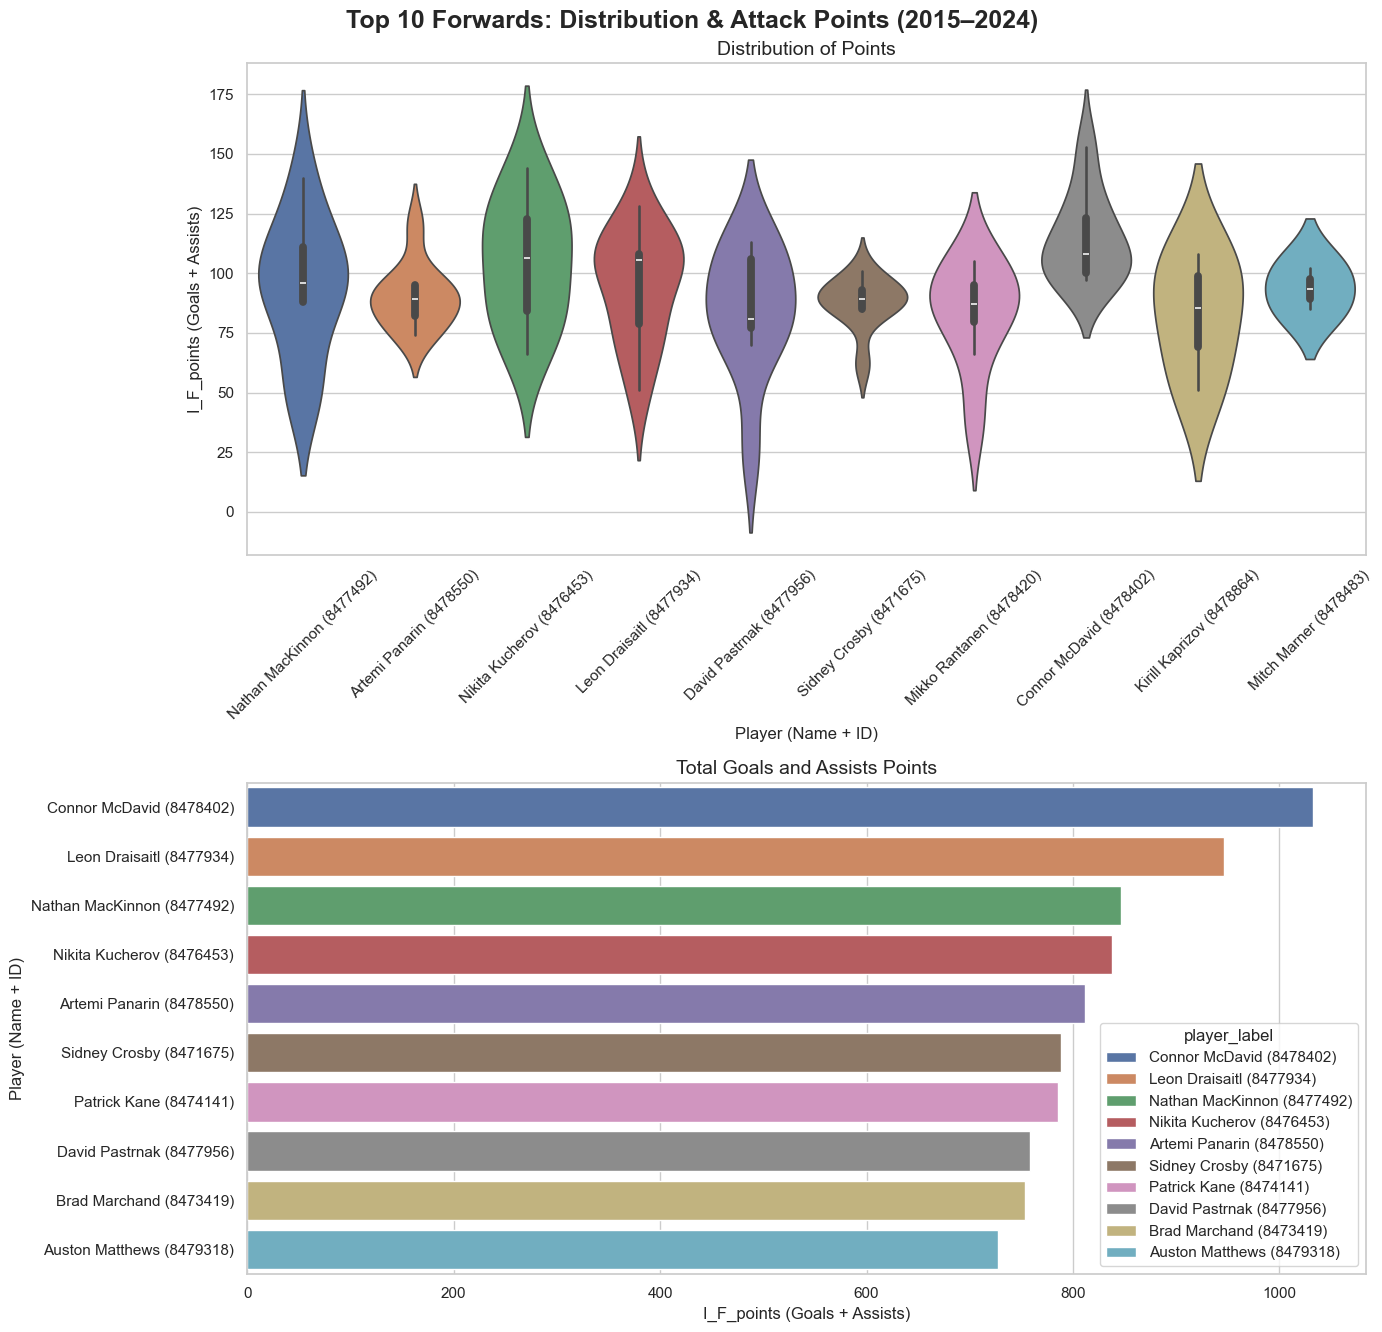

In [143]:
# Top 10 forwards based on average I_F_points
top10_if_points_mean = (
    df_forwards_attacks.groupby('player_label')['I_F_points']
    .mean()
    .nlargest(10)
    .reset_index()
)

# The player labels of the top 10 players
top10_labels = top10_if_points_mean['player_label'].tolist()

# Filter the DataFrame for only the top 10 players
df_top10_points_mean = df_forwards_attacks[df_forwards_attacks['player_label'].isin(top10_labels)].copy()

# Top 10 forwards based on total I_F_points
top10_points_sum = (
    df_forwards_attacks.groupby(['player_label'])['I_F_points']
    .sum()
    .nlargest(10)
    .reset_index()
)
df_top10_points_sum = top10_points_sum

# Set up the matplotlib figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 14))
fig.suptitle('Top 10 Forwards: Distribution & Attack Points (2015–2024)', fontsize=18, fontweight='bold')

# Violin Plot for Points Distribution
sns.violinplot(
    data=df_top10_points_mean,
    x='player_label',
    y='I_F_points',
    hue='player_label',
    ax=axes[0]
)
axes[0].set_title('Distribution of Points', fontsize=14)
axes[0].set_xlabel('Player (Name + ID)')
axes[0].set_ylabel('I_F_points (Goals + Assists)')
axes[0].tick_params(axis='x', rotation=45)

# Bar Plot for Goals and Assists Points
sns.barplot(
    data=df_top10_points_sum,
    x='I_F_points',
    y='player_label',
    hue='player_label',
    legend=True,
    ax=axes[1]
)
axes[1].set_title('Total Goals and Assists Points', fontsize=14)
axes[1].set_xlabel('I_F_points (Goals + Assists)')
axes[1].set_ylabel('Player (Name + ID)')

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

#### Histogram for Points, Goals, and Assist Metrics

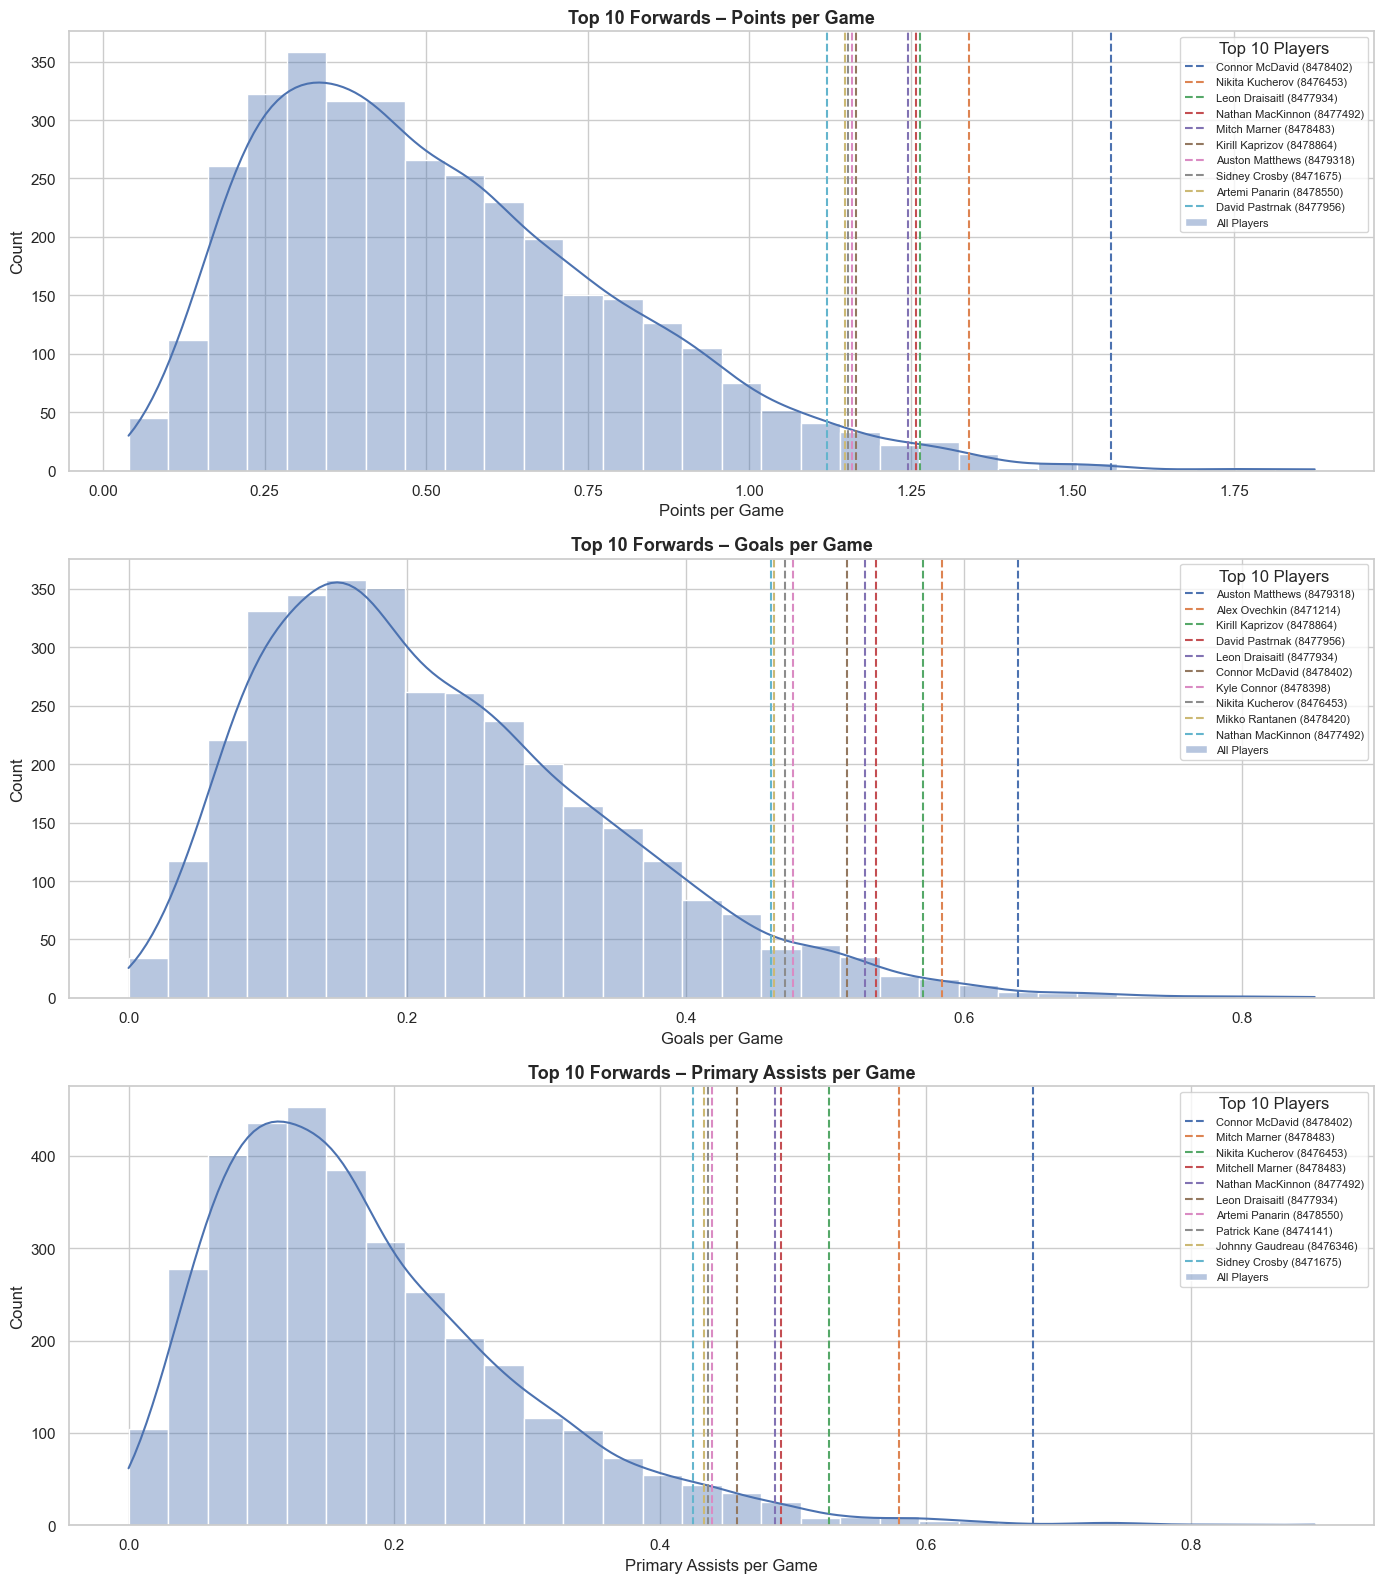

In [144]:
# Create per game metrics
df_forwards_attacks['Points_per_Game'] = df_forwards_attacks['I_F_points'] / df_forwards_attacks['games_played']
df_forwards_attacks['Goals_per_Game'] = df_forwards_attacks['I_F_goals'] / df_forwards_attacks['games_played']
df_forwards_attacks['Primary_Assists_per_Game'] = df_forwards_attacks['I_F_primaryAssists'] / df_forwards_attacks['games_played']

# Top10 players based on per game metrics
top10_points_per_game = (
    df_forwards_attacks.groupby('player_label')['Points_per_Game']
    .mean().nlargest(10).reset_index()
)
top10_goals_per_game = (
    df_forwards_attacks.groupby('player_label')['Goals_per_Game']
    .mean().nlargest(10).reset_index()
)
top10_primary_assists_per_game = (
    df_forwards_attacks.groupby('player_label')['Primary_Assists_per_Game']
    .mean().nlargest(10).reset_index()
)

# Color palette
colors = sns.color_palette("deep", 10)

fig, axes = plt.subplots(3, 1, figsize=(14, 16))

# Points per Game
sns.histplot(df_forwards_attacks['Points_per_Game'], bins=30, kde=True, alpha=0.4, ax=axes[0], label='All Players')
for idx, row in top10_points_per_game.iterrows():
    axes[0].axvline(x=row['Points_per_Game'], color=colors[idx], linestyle='--', label=row['player_label'])
axes[0].set_title('Top 10 Forwards – Points per Game', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Points per Game')
axes[0].set_ylabel('Count')
axes[0].legend(title="Top 10 Players", fontsize=8)

# Goals per Game
sns.histplot(df_forwards_attacks['Goals_per_Game'], bins=30, kde=True, alpha=0.4, ax=axes[1], label='All Players')
for idx, row in top10_goals_per_game.iterrows():
    axes[1].axvline(x=row['Goals_per_Game'], color=colors[idx], linestyle='--', label=row['player_label'])
axes[1].set_title('Top 10 Forwards – Goals per Game', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Goals per Game')
axes[1].set_ylabel('Count')
axes[1].legend(title="Top 10 Players", fontsize=8)

# Primary Assists per Game
sns.histplot(df_forwards_attacks['Primary_Assists_per_Game'], bins=30, kde=True, alpha=0.4, ax=axes[2], label='All Players')
for idx, row in top10_primary_assists_per_game.iterrows():
    axes[2].axvline(x=row['Primary_Assists_per_Game'], color=colors[idx], linestyle='--', label=row['player_label'])
axes[2].set_title('Top 10 Forwards – Primary Assists per Game', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Primary Assists per Game')
axes[2].set_ylabel('Count')
axes[2].legend(title="Top 10 Players", fontsize=8)

plt.tight_layout()
plt.show()


#### Point Plot for Expected Goals and Shot Quality Metrics

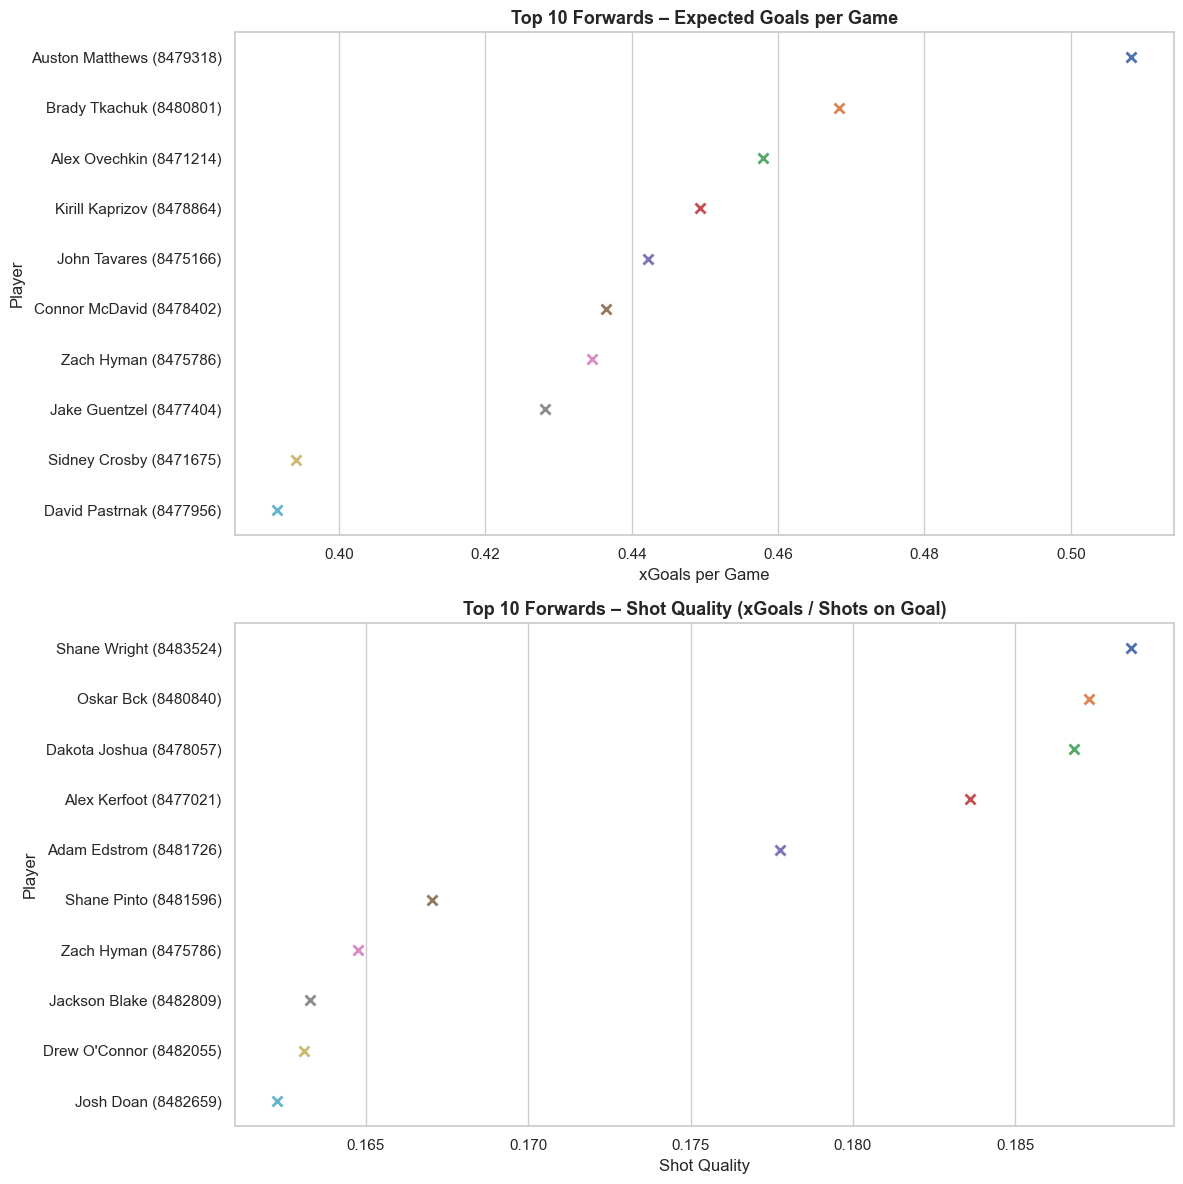

In [145]:
# Create xGoals per Game and Shot Quality metrics
df_forwards_attacks['xGoals_per_Game'] = df_forwards_attacks['I_F_xGoals'] / df_forwards_attacks['games_played']
df_forwards_attacks['Shot_Quality'] = df_forwards_attacks['I_F_xGoals'] / df_forwards_attacks['I_F_shotsOnGoal']

# Top10 players based on xGoals per Game and Shot Quality
top10_xGoals_per_Game = (
    df_forwards_attacks.groupby('player_label')['xGoals_per_Game']
    .mean().nlargest(10).reset_index()
)
top10_shot_quality = (
    df_forwards_attacks.groupby('player_label')['Shot_Quality']
    .mean().nlargest(10).reset_index()
)

# Color palette
colors = sns.color_palette("deep", 10)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# xGoals per Game
sns.pointplot(
    data=top10_xGoals_per_Game,
    x='xGoals_per_Game', y='player_label',
    hue='player_label', palette=colors, legend=False,
    markers='x', linestyle='none', ax=axes[0]
)
axes[0].set_title("Top 10 Forwards – Expected Goals per Game", fontsize=13, fontweight='bold')
axes[0].set_xlabel("xGoals per Game")
axes[0].set_ylabel("Player")

# Shot Quality
sns.pointplot(
    data=top10_shot_quality,
    x='Shot_Quality', y='player_label',
    hue='player_label', palette=colors, legend=False,
    markers='x', linestyle='none', ax=axes[1]
)
axes[1].set_title("Top 10 Forwards – Shot Quality (xGoals / Shots on Goal)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("Shot Quality")
axes[1].set_ylabel("Player")

plt.tight_layout()
plt.show()

#### Bar for Primary and Seconday Assist Metrics

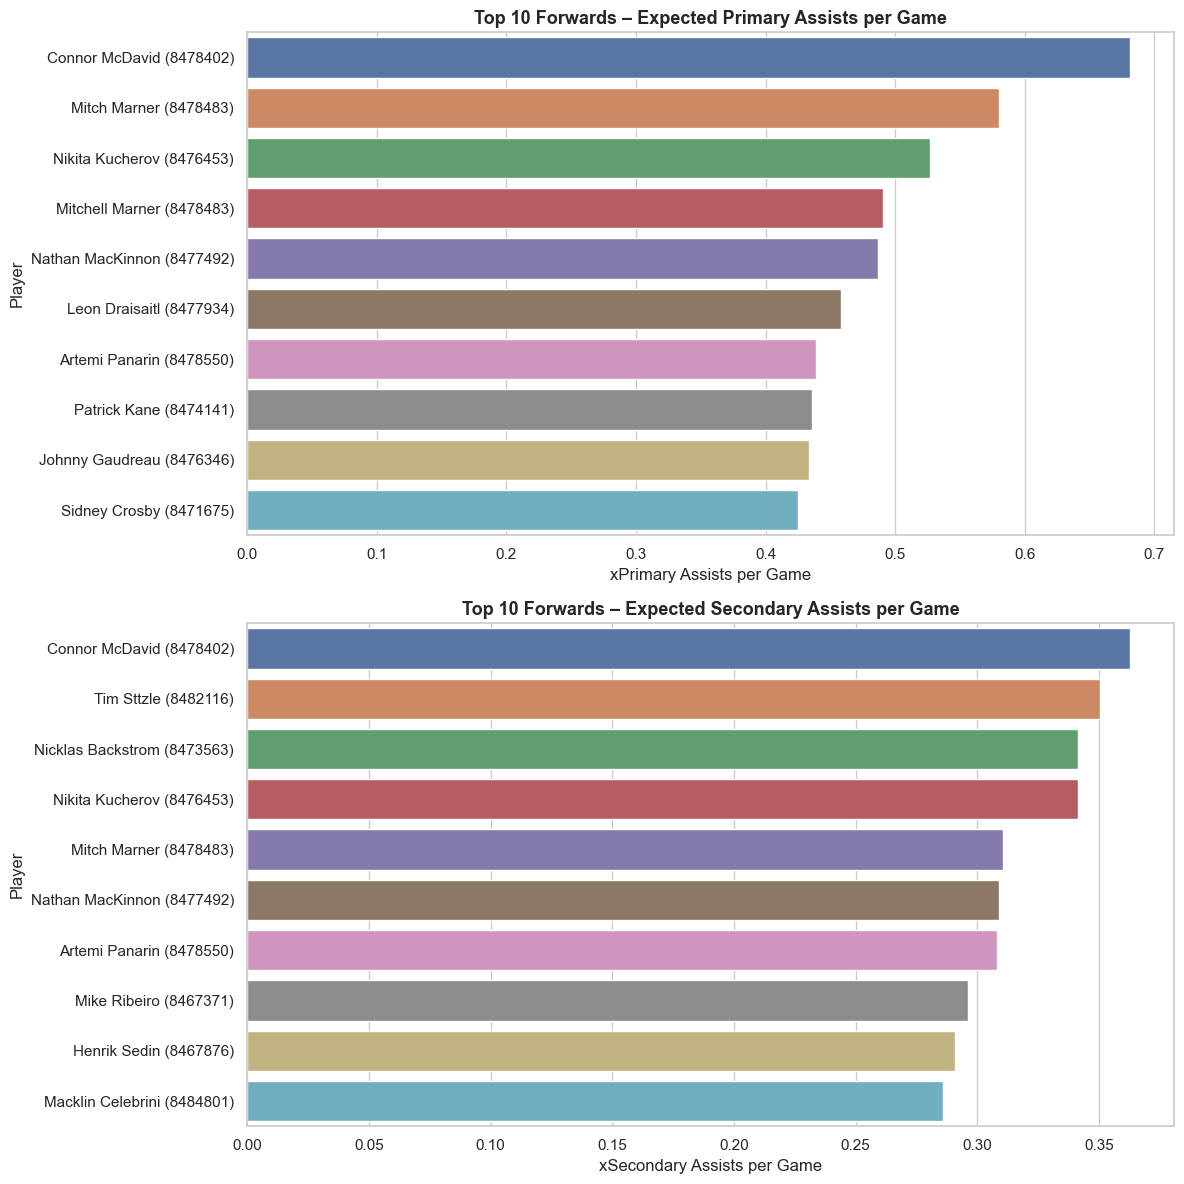

In [146]:
# Create xPrimary and xSecondary Assists per Game metrics
df_forwards_attacks['xPrimary_Assists_per_Game'] = (
    df_forwards_attacks['I_F_primaryAssists'] / df_forwards_attacks['games_played']
)
df_forwards_attacks['xSecondary_Assists_per_Game'] = (
    df_forwards_attacks['I_F_secondaryAssists'] / df_forwards_attacks['games_played']
)

# Top10 players based on xPrimary and xSecondary Assists per Game
top10_xPrimary = (
    df_forwards_attacks.groupby('player_label')['xPrimary_Assists_per_Game']
    .mean().nlargest(10).reset_index()
)
top10_xSecondary = (
    df_forwards_attacks.groupby('player_label')['xSecondary_Assists_per_Game']
    .mean().nlargest(10).reset_index()
)

# Color palette
colors = sns.color_palette("deep", 10)

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Primary Assists per Game
sns.barplot(
    data=top10_xPrimary,
    x='xPrimary_Assists_per_Game', y='player_label',
    palette=colors, hue='player_label', legend=False, 
    ax=axes[0]
)
axes[0].set_title("Top 10 Forwards – Expected Primary Assists per Game", fontsize=13, fontweight='bold')
axes[0].set_xlabel("xPrimary Assists per Game")
axes[0].set_ylabel("Player")

# Secondary Assists per Game
sns.barplot(
    data=top10_xSecondary,
    x='xSecondary_Assists_per_Game', y='player_label',
    palette=colors, hue='player_label', legend=False, 
    ax=axes[1]
)
axes[1].set_title("Top 10 Forwards – Expected Secondary Assists per Game", fontsize=13, fontweight='bold')
axes[1].set_xlabel("xSecondary Assists per Game")
axes[1].set_ylabel("Player")

plt.tight_layout()
plt.show()


#### Heatmap for Overall Attack Stats

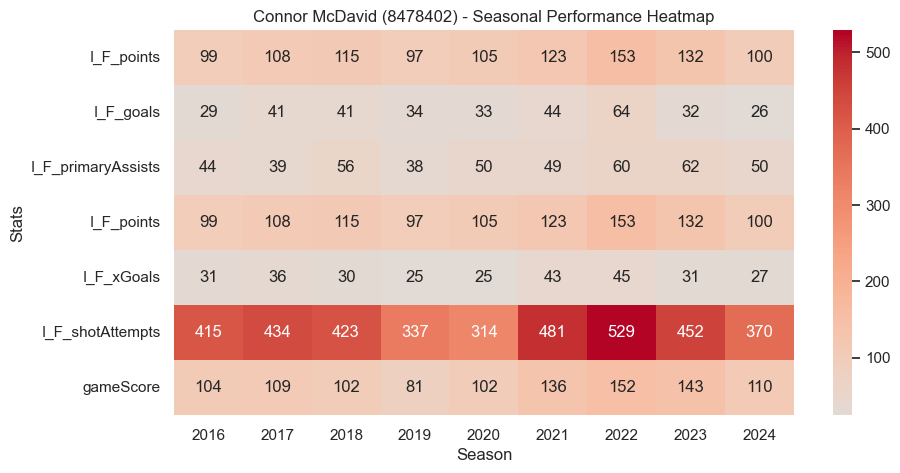

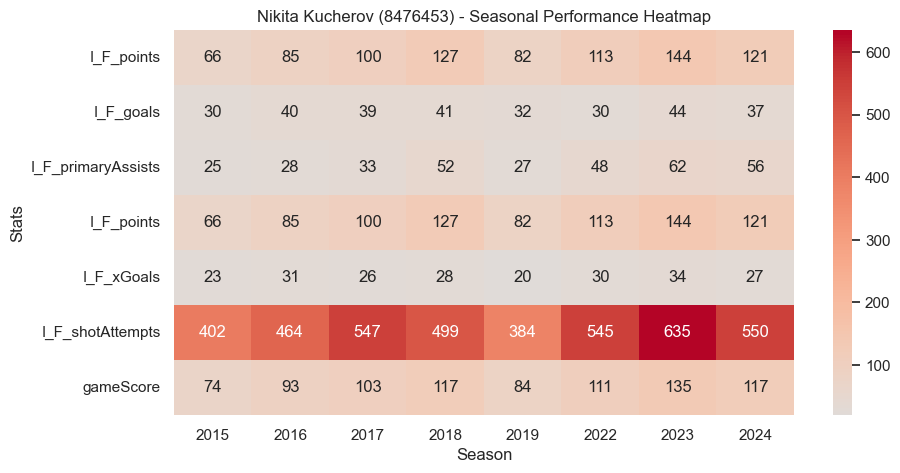

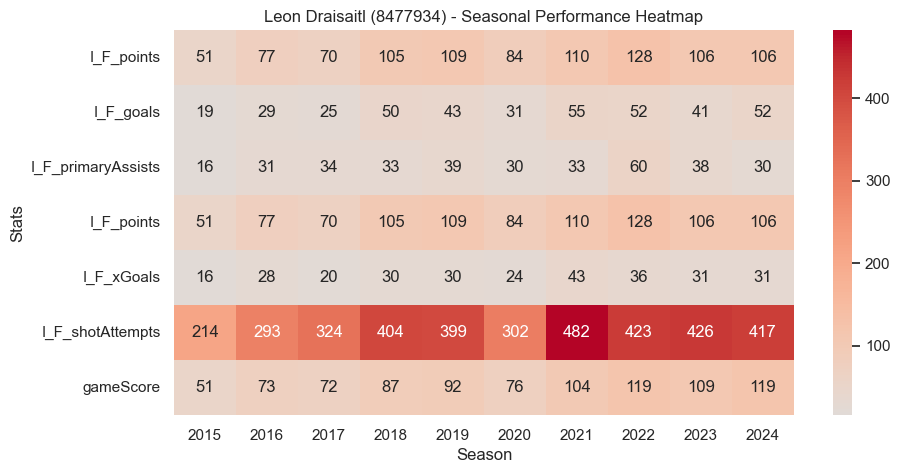

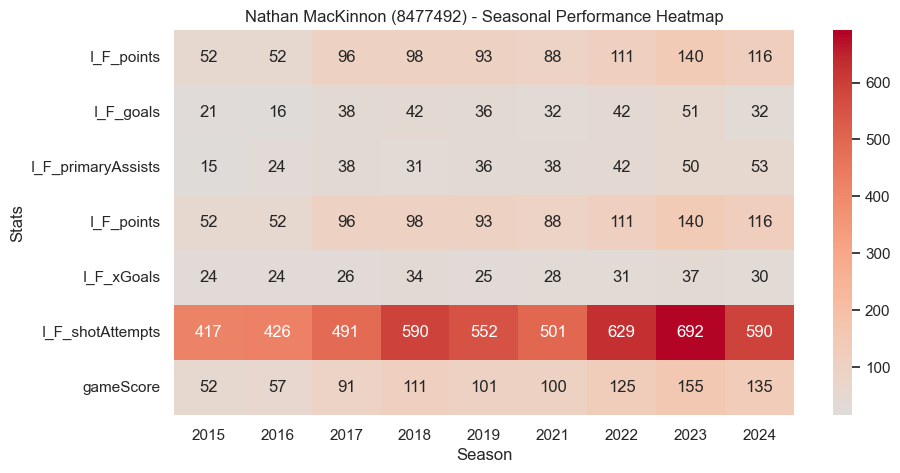

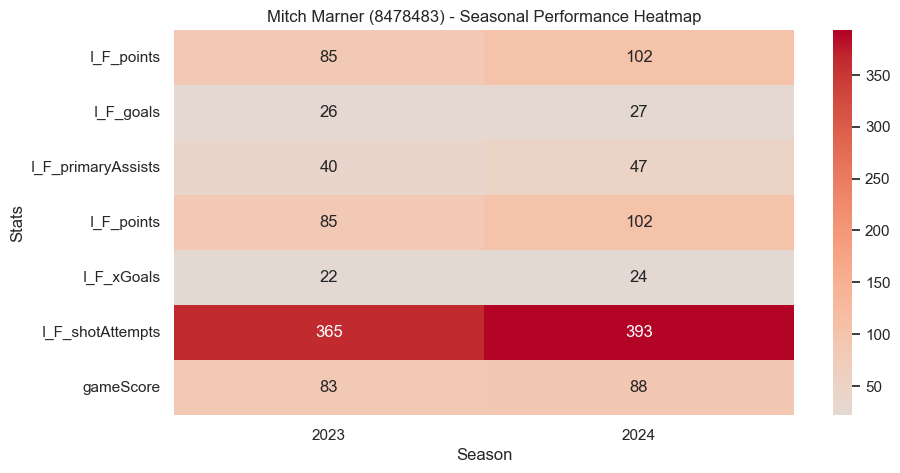

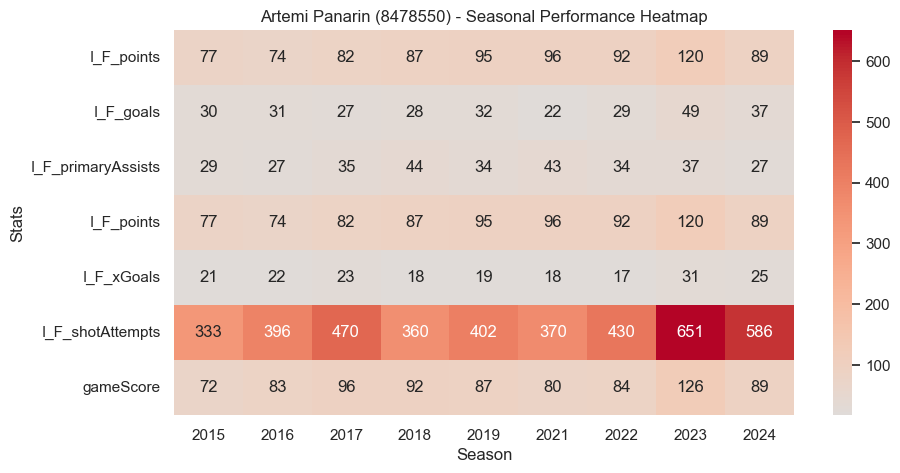

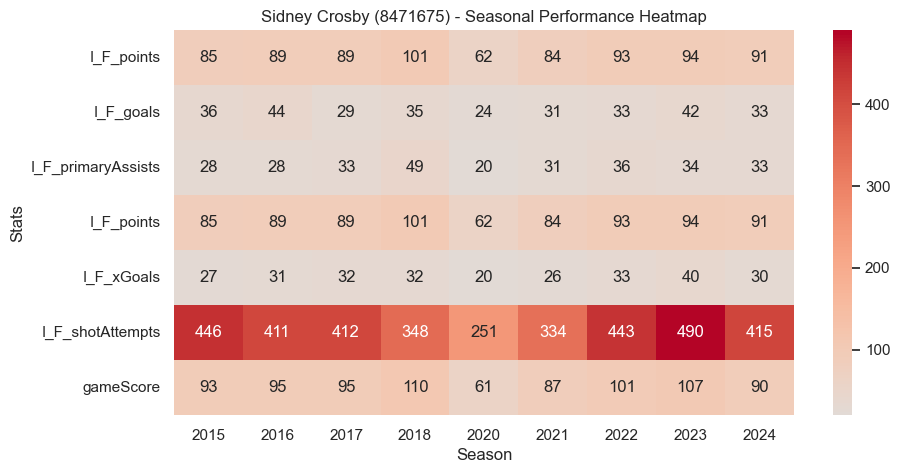

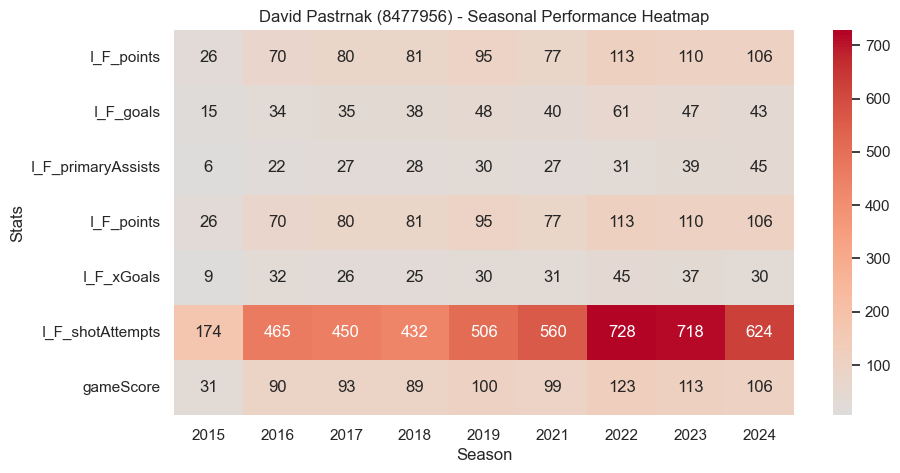

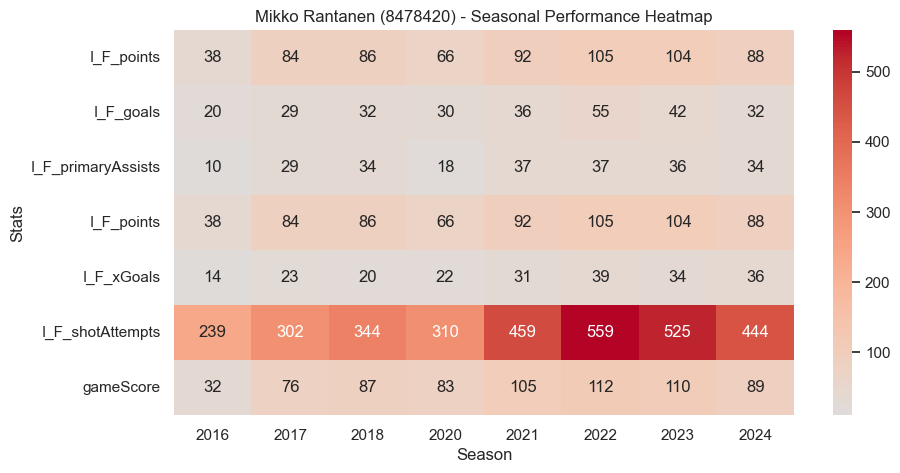

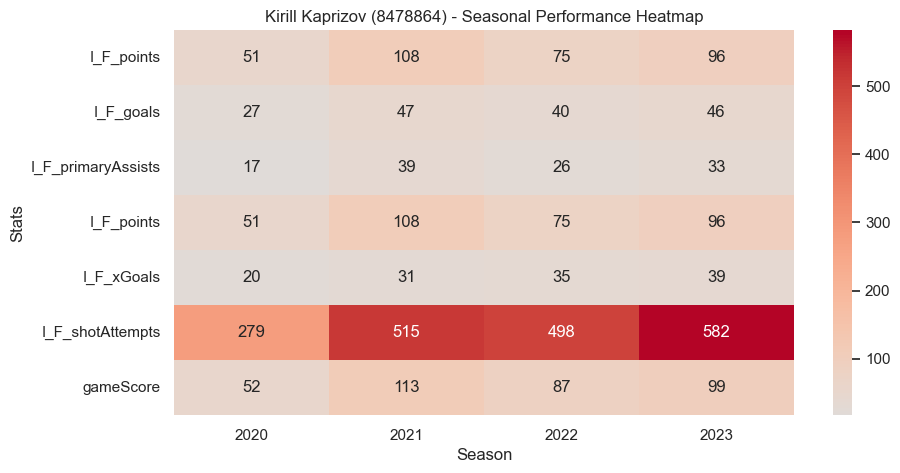

In [147]:
heatmap_cols = ['I_F_points', 'I_F_goals', 'I_F_primaryAssists', 'I_F_points', 'I_F_xGoals', 'I_F_shotAttempts', 'gameScore']

df_top10 = df_forwards_attacks[df_forwards_attacks['player_label'].isin(top10_labels)]

for player in top10_labels:
    player_data = (
        df_top10[df_top10['player_label'] == player]
        .groupby('season')[heatmap_cols]
        .mean()
    )

    plt.figure(figsize=(10,5))
    sns.heatmap(player_data.T, annot=True, cmap='coolwarm', center=0, fmt='.0f')
    plt.title(f"{player} - Seasonal Performance Heatmap")
    plt.xlabel("Season")
    plt.ylabel("Stats") 
    plt.show()


### 3. **Consistency and Trends:** Who showed the most consistent offensive performance over time?

- In the line chart, Connor McDavid shows the most consistent offensive performance over time as maintaining a high level of production (typically 97+ points) with minimal fluctuations across nearly a decade.

#### Line for Trend Points 

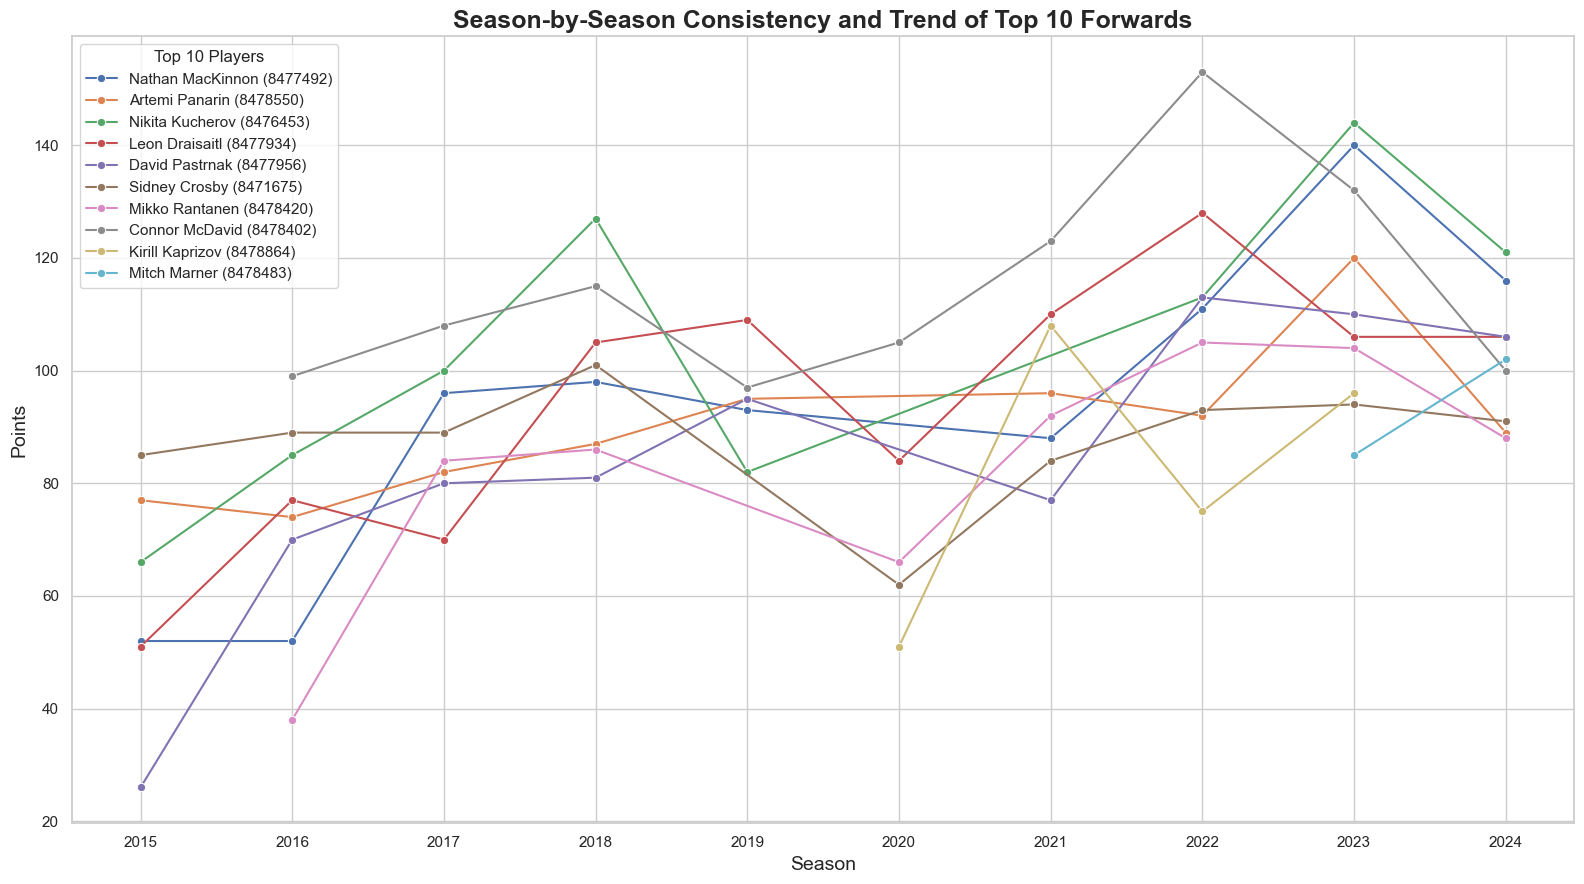

In [148]:
df_top10_seasons = df_forwards_attacks[df_forwards_attacks['player_label'].isin(top10_labels)]

plt.figure(figsize=(16, 9))
sns.lineplot(data=df_top10_seasons, x='season', y='I_F_points', hue='player_label', marker='o')

plt.title('Season-by-Season Consistency and Trend of Top 10 Forwards', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.xticks(df_forwards_attacks['season'].unique())
plt.legend(title='Top 10 Players')
plt.tight_layout()
plt.show()

In [149]:
mcdavid = df_forwards_attacks[df_forwards_attacks['player_label'] == 'Connor McDavid (8478402)']
mcdavid_total = mcdavid.groupby('season')['I_F_points'].sum()
print(mcdavid_total)

season
2016     99.0
2017    108.0
2018    115.0
2019     97.0
2020    105.0
2021    123.0
2022    153.0
2023    132.0
2024    100.0
Name: I_F_points, dtype: float64


### 4. **Separation from Peers:** Which seasons did players separate most from their peers offensively?

- In the line chart, players separated most from their peers offensively in 2022, when Connor McDavid achieved the largest gap (+112.57 points above the league average of forward). However, the overall league average has the highest performance as 40.776882.

#### Line for Top vs Average for Best Forward

   season  season_avg               player_label  I_F_points        diff
0    2015   34.726225     Patrick Kane (8474141)       106.0   71.273775
1    2016   34.871148   Connor McDavid (8478402)        99.0   64.128852
2    2017   38.497253   Connor McDavid (8478402)       108.0   69.502747
3    2018   38.608696  Nikita Kucherov (8476453)       127.0   88.391304
4    2019   34.418675   Leon Draisaitl (8477934)       109.0   74.581325
5    2020   31.294393   Connor McDavid (8478402)       105.0   73.705607
6    2021   39.789333   Connor McDavid (8478402)       123.0   83.210667
7    2022   40.427083   Connor McDavid (8478402)       153.0  112.572917
8    2023   40.776882  Nikita Kucherov (8476453)       144.0  103.223118
9    2024   40.093583  Nikita Kucherov (8476453)       121.0   80.906417


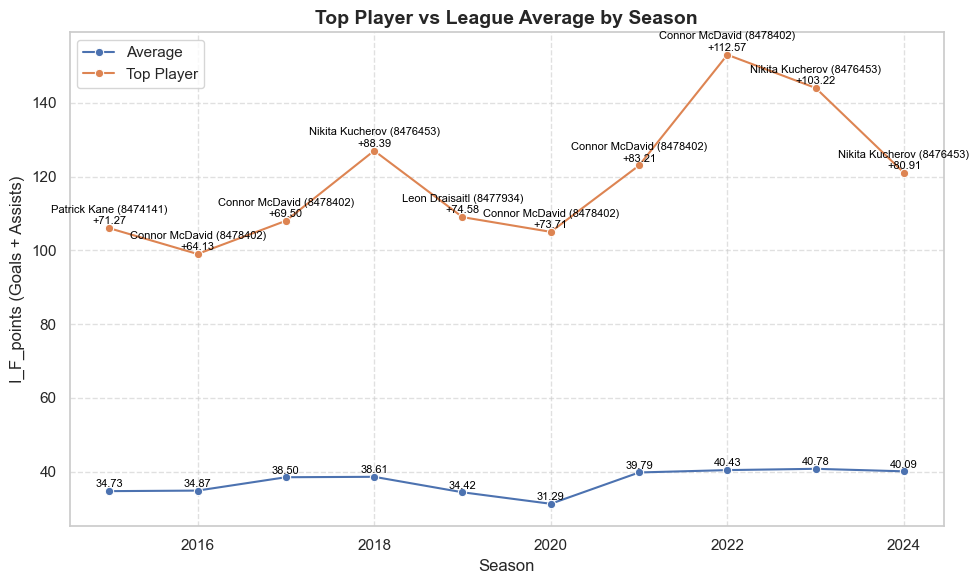

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average points per player per season
season_stats = (
    df_forwards_attacks.groupby(['season', 'player_label'])['I_F_points']
    .mean()
    .reset_index()
)

# Calculate the season average
season_avg = (
    season_stats.groupby('season')['I_F_points']
    .mean()
    .reset_index()
    .rename(columns={'I_F_points':'season_avg'})
)

# Extract top player for each season
season_top = (
    season_stats.loc[season_stats.groupby('season')['I_F_points'].idxmax()]
    .reset_index()
)

# Merge average and top player
compare = season_avg.merge(
    season_top[['season', 'player_label', 'I_F_points']],
    on='season',
    how='left'
)

# Calculate the difference
compare['diff'] = compare['I_F_points'] - compare['season_avg']
print(compare)

plt.figure(figsize=(10,6))
sns.lineplot(data=compare, x='season', y='season_avg', label='Average', marker='o')
sns.lineplot(data=compare, x='season', y='I_F_points', label='Top Player', marker='o')

# Annotate each top player with their name and difference
for _, row in compare.iterrows():
    plt.text(
        row['season'], 
        row['I_F_points'] + 1.0, 
        f"{row['player_label']}\n+{row['diff']:.2f}",
        color='black',
        fontsize=8, 
        ha='center'
    )

# Annotate each season average with its value
for _, row in compare.iterrows():
    plt.text(
        row['season'], 
        row['season_avg'] + 1.0, 
        f"{row['season_avg']:.2f}",
        color='black',
        fontsize=8, 
        ha='center'
    )

plt.title('Top Player vs League Average by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('I_F_points (Goals + Assists)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Step 4: Draw Insights & Reflect

**What We Did:**

- Defined offensive performance under the all situation, focusing on I_F_points (Goals + Assists) as the core measure with another stats.
- Cleaned dataset as making minimum games by average and created new colum for player label to prevent duplicate name.
- Explored multiple components including I_F_goals, I_F_primaryAssists, I_F_secondaryAssists, I_F_xGoals, I_F_shotAttempts, and gameScore.
- Analyzed distributions with histograms, violin plots, point plots, and bar charts to compare top 10 players by points, goals, and assists per game.
- Examined Expected Goals and Shot Quality to evaluate finishing ability.
- Examined Primary and Secondary Assists to evaluate playmaking ability.
- Visualized performance balance with a heatmap to reveal overall offensive consistency across metrics.
- Visualized consistency and trend of Top 10 forwards.
- Utilized line charts to find outperform palyer with season average and top player.

**Key Takeaways:**

- I_F_points remains the most comprehensive metric for offensive performance, as it reflects both goal scoring and playmaking.
- Heatmap shows comprehensive overall stats for each player. It is good for visualizing performance balance and identifying which areas ('I_F_points', 'I_F_goals', 'I_F_primaryAssists', 'I_F_points', 'I_F_xGoals', 'I_F_shotAttempts', 'gameScore') a player excels or lags in.
- The Top Player vs League Average by Season visualization clearly identifies forwards who outperform the league in total points.

## Step 5: **Final Recommendation:** Based on the analysis, who was the most offensively dominant forward from 2015 to 2024 and why?

- Based on the overall analysis, **Connor McDavid** clearly stands out as the most offensively dominant forward from 2015 to 2024.  
- The **violin and bar charts** show that his **I_F_points (Goals + Assists)** consistently stayed near the top. It proves his high offensive output across all conditions.
- The **histogram** shows that his points per game are the highest, his goals per game rank sixth, and his primary assists per game are also the highest.
- The **point plot** shows that his expected goals are high, but he is not among the top players in the actual goals category.
- The **bar plot** shows that his playmaking ability is untouchable compared to other players.
- The **hit map** shows that his attack overall offensive performance is consistently strong with evenly distributed red areas compared to other players.
- In the **Trend line chart**, McDavid maintained **steady elite-level performance** (always 97+ points) with minimal fluctuations. It shows remarkable consistency over a decade.  
- In the **Top Player vs League Average** chart, McDavid achieved the **largest gap in 2022 (+112.57 points above league average)**. It demonstrates his dominance on the NHL.  

### **Conclusion**
- **Connor McDavid** represents the benchmark of modern offensive excellence, because he consistently combines high offensive output, remarkable consistency, and sustained dominance across seasons. His combination of balanced offensive ability and long-term consistency distinguishes him as the benchmark for forwards in the modern NHL era.
